[View in Colaboratory](https://colab.research.google.com/github/datalifelab/corso-open-notebook-science/blob/master/corso_su_colaboratory.ipynb)

# Corso su Colaboratory
## Questo notebook contiene alcune librerie per lavorare in modo integrato nell'ecosistema di google drive:
### Aprire fogli di calcolo di google
### Effettuare la pulizia della matrice dall'importazione


In [16]:
%%html
<marquee style='width: 100%; color: blue;'><b>Buon divertimento!!</b></marquee>

In [0]:
#effettuo l'importazione della libreria per il controllo del sistema operativo
import os
#effettuo l'importazione della libreria statistica Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
!pip install --upgrade -q gspread

In [0]:
#Effettuo le librerie che mi autorizzano ad accedere ai file di google drive
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

#richiedo le credenziali: apre delle istruzioni e link da seguire per completare
#la procedura
gc = gspread.authorize(GoogleCredentials.get_application_default())



In [0]:
def download_gspread(nome_file, nome_del_foglio = "Foglio1"):
  '''questa funzione, dato il nome del file di google spreadsheet
  e dello specifico foglio di calcolo (opzionale) di google
  restituisce un dataframe di pandas'''
  
  def str_to_float(cell):
    '''trasforma in decimale 
    tutti i valori stringa contententi 
    valori numerici'''
    
    try:
      cell = float(cell)
    except:
      cell = cell
    return cell
  
  #questo comando scarica il foglio 1 del foglio di calcolo
  if nome_del_foglio == "Foglio1":
    worksheet = gc.open(nome_file).sheet1
  else:
    worksheet = gc.open(nome_file).worksheet(nome_del_foglio)

  # prendo tutte le righe del foglio
  rows = worksheet.get_all_values()

  # Converto in DataFrame di Pandas ed effettuo la pulizia dei dati con la funzione
  # str_to_float
  
  dati = pd.DataFrame.from_records(rows)
  dati.columns = dati.loc[0]
  dati = dati.drop(0, axis = 0)
  dati = dati.applymap(str_to_float)
  
  
  return dati 

In [0]:
dataset = download_gspread("esercitazione")

In [22]:
dataset.mean()

0
età           43.555556
reddito    30898.000000
dtype: float64

In [23]:
dataset["reddito"].mean()

30898.0

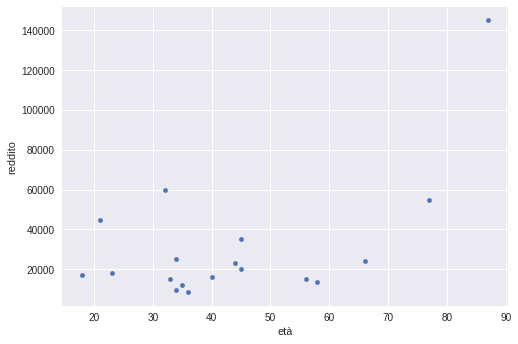

In [28]:
#grafici base
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

dataset.loc[:,["età", "reddito"]].plot(kind = "scatter", y = "reddito", x = "età", )

In [29]:
# Grafici interattivi
import altair as alt
alt.Chart(dataset).mark_point().encode(
  y="reddito",
  x="età",
  color='allineamento politico'
).interactive()

Chart({
  data: 0  genere   età allineamento politico   reddito
  1       F  45.0                destra   20000.0
  2       M  34.0                centro   25000.0
  3       M  23.0              sinistra   18000.0
  4       F  18.0              sinistra   17000.0
  5       M  77.0                destra   54664.0
  6       M  45.0              sinistra   35000.0
  7       F  33.0                destra   15000.0
  8       F  35.0                destra   12000.0
  9       F  36.0                centro    8500.0
  10      F  56.0                centro   15000.0
  11      F  58.0              sinistra   13500.0
  12      M  40.0              sinistra   16000.0
  13      M  87.0                centro  145000.0
  14      M  44.0              sinistra   23000.0
  15      M  34.0                destra    9500.0
  16      M  66.0                centro   24000.0
  17      M  32.0                destra   60000.0
  18      M  21.0                destra   45000.0,
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'allineamento politico'
    }),
    x: X({
      shorthand: 'età'
    }),
    y: Y({
      shorthand: 'reddito'
    })
  }),
  mark: 'point',
  selection: SelectionMapping({
    selector007: SelectionDef({
      bind: 'scales',
      encodings: ['x', 'y'],
      type: 'interval'
    })
  })
})

[tipi di grafico](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [30]:
brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    x='età:Q',
    y='reddito:Q',
    color=alt.condition(brush, 'allineamento politico:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart().mark_bar().encode(
    y='allineamento politico:N',
    color='allineamento politico:N',
    x='count(allineamento politico):Q'
).transform_filter(
    brush
)

alt.vconcat(points, bars, data=dataset)

VConcatChart({
  data: 0  genere   età allineamento politico   reddito
  1       F  45.0                destra   20000.0
  2       M  34.0                centro   25000.0
  3       M  23.0              sinistra   18000.0
  4       F  18.0              sinistra   17000.0
  5       M  77.0                destra   54664.0
  6       M  45.0              sinistra   35000.0
  7       F  33.0                destra   15000.0
  8       F  35.0                destra   12000.0
  9       F  36.0                centro    8500.0
  10      F  56.0                centro   15000.0
  11      F  58.0              sinistra   13500.0
  12      M  40.0              sinistra   16000.0
  13      M  87.0                centro  145000.0
  14      M  44.0              sinistra   23000.0
  15      M  34.0                destra    9500.0
  16      M  66.0                centro   24000.0
  17      M  32.0                destra   60000.0
  18      M  21.0                destra   45000.0,
  vconcat: [Chart({
    encoding: EncodingWithFacet({
      color: ColorValue({
        condition: Color({
          selection: 'selector008',
          shorthand: 'allineamento politico:N'
        }),
        value: 'lightgray'
      }),
      x: X({
        shorthand: 'età:Q'
      }),
      y: Y({
        shorthand: 'reddito:Q'
      })
    }),
    mark: 'point',
    selection: SelectionMapping({
      selector008: SelectionDef({
        type: 'interval'
      })
    })
  }), Chart({
    encoding: EncodingWithFacet({
      color: Color({
        shorthand: 'allineamento politico:N'
      }),
      x: X({
        shorthand: 'count(allineamento politico):Q'
      }),
      y: Y({
        shorthand: 'allineamento politico:N'
      })
    }),
    mark: 'bar',
    transform: [FilterTransform({
      filter: {'selection': 'selector008'}
    })]
  })]
})